This is notebook for applying final patches to the population


1.   Better regression for height, weight
2.   Adding homebound population and the associated data cleaning and fixes
3.   Rounding of lat longs, height, weights

This notebook has been cleaned so that the variables names are not dependent on any city. Next time we need a population, we just need to adjust the files being read and nothing else needs to be changed to generate the output from the notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/PhD_Data/Synth_Pop/Pune

/content/drive/.shortcut-targets-by-id/1vnUJ-Ez1FVwqH9G9p56OEli4-T2r75qU/Pune


In [ ]:
!ls /content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Source_Files/36151-0001-Data.dta

/content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Source_Files/36151-0001-Data.dta


In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
ihds_df = pd.read_stata("/content/drive/MyDrive/syndata_ism/IHDS2_I.dta")
columns_to_keep = ['RO3', 'RO5', 'HHID', 'HHSPLITID', 'ID11', 'ID13', 'AP5', 'AP8', 'STATEID', 'DISTRICT', 'PSUID', 'MB4', 'MB5', 'MB6', 'MB7', 'MB8', 'MB9', 'MB10', 'MB11', 'MB12', 'MB13', 'MB14', 'MB15', 'MB16', 'MB17']
columns_rename_dict = {'RO3': 'Sex', 'RO5': 'Age', 'HHID': 'HHID', 'ID11': 'Religion', 'ID13': 'Caste', 'AP5': 'Height', 'AP8': 'Weight', 'STATEID': 'State', 'DISTID': 'District', 'PSUID': 'PSUID', 'MB4': 'M_Fever', 'MB5': 'M_Cough', 'MB6': 'M_Diarrhea', 'MB7': 'M_Cataract', 'MB8': 'M_TB', 'MB9': 'M_High_BP', 'MB10': 'M_Heart_disease', 'MB11': 'M_Diabetes', 'MB12': 'M_Leprosy', 'MB13': 'M_Cancer', 'MB14': 'M_Asthma', 'MB15': 'M_Polio', 'MB16': 'M_Paralysis', 'MB17': 'M_Epilepsy'}
ihds_df = ihds_df[columns_to_keep].rename(columns=columns_rename_dict)
# ihds_df

In [ ]:
boundary_ihds_df = ihds_df[ihds_df['DISTRICT']=='Pune']
boundary_ihds_df = boundary_ihds_df[['Age', 'Height', 'Weight', 'Sex']].dropna().reset_index(drop=True)
# boundary_ihds_df

In [ ]:
boundary_ihds_age_male_subset = boundary_ihds_df[boundary_ihds_df['Sex']=='Male 1']
boundary_ihds_age_female_subset = boundary_ihds_df[boundary_ihds_df['Sex']=='Female 2']

In [ ]:
female_weights_poly = np.polyfit(pow(boundary_ihds_age_female_subset['Age'], 1/4), boundary_ihds_age_female_subset['Weight'], deg=8)
female_heights_poly = np.polyfit(pow(boundary_ihds_age_female_subset['Age'], 1/4), boundary_ihds_age_female_subset['Height'], deg=8)
male_weights_poly = np.polyfit(pow(boundary_ihds_age_male_subset['Age'], 1/4), boundary_ihds_age_male_subset['Weight'], deg=8)
male_heights_poly = np.polyfit(pow(boundary_ihds_age_male_subset['Age'], 1/4), boundary_ihds_age_male_subset['Height'], deg=8)

In [ ]:
del ihds_df
del boundary_ihds_df
del boundary_ihds_age_male_subset
del boundary_ihds_age_female_subset
import gc
gc.collect()


67

In [ ]:
synthetic_population = pd.read_csv("/content/drive/MyDrive/syndata_ism/mumbai/base_population_data/Add_Height_Weight_Homebound.csv")
synthetic_population

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SexLabel,Age,Religion,Caste,HHID,H_Lat,H_Lon,AdminUnitName,AdminUnitLatitude,AdminUnitLongitude,JobLabel,JobID,essential_worker,PublicTransport_Jobs,Adherence_to_Intervention,WorksAtSameCategory,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,StateLabel,PSUID,Agent_ID,District,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy
0,Male,41,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.9,True,2001000038901,19.038877,72.881458,0,NaN,NaN,3001000003866,18.994719,72.859246,Maharashtra,2,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,Male,44,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.9,True,2001000001766,19.006767,72.839661,0,NaN,NaN,3001000000187,19.083750,72.882348,Maharashtra,16,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,Female,39,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Loaders,97,1,1,0.0,True,2001000020624,19.019421,72.913071,0,NaN,NaN,3001000001887,19.103728,72.830115,Maharashtra,7,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Female,36,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.0,True,2001000024618,19.021740,72.906383,0,NaN,NaN,3001000002375,19.033971,72.875532,Maharashtra,10,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,Male,41,Hindu,SC,51902100136,19.020086,72.861478,F/N,19.029420,72.854606,Construction,95,0,1,0.9,True,2001000009395,18.983487,72.819453,0,NaN,NaN,3001000000926,19.113840,72.927938,Maharashtra,22,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12442367,Female,7,sikh,other,51902085222,19.074365,72.889036,L,19.070467,72.879094,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000021853,19.080787,72.900484,3001000000384,19.094588,72.869153,Maharashtra,2,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
12442368,Female,7,sikh,other,51902085477,19.202094,72.848476,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000018217,19.158039,72.832168,3001000002980,19.176032,72.810636,Maharashtra,5,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
12442369,Female,8,sikh,other,51902085477,19.202094,72.848476,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000045706,19.206766,72.818168,3001000003865,19.200105,72.829187,Maharashtra,5,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
12442370,Female,7,sikh,other,51902085477,19.202094,72.848476,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000029586,19.191397,72.932506,3001000001620,19.224587,72.820639,Maharashtra,14,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
female_index = synthetic_population['SexLabel']=='Female'
female_weights = np.polyval(female_weights_poly, pow(synthetic_population[female_index]['Age'].apply(lambda x : min(x,75)),1/4))
female_weights = np.round(female_weights+np.random.normal(0, 0.5, size = female_weights.shape), 2)

female_heights = np.polyval(female_heights_poly, pow(synthetic_population[female_index]['Age'].apply(lambda x : min(x,75)),1/4))
female_heights = np.round(female_heights+np.random.normal(0, 0.5, size = female_heights.shape), 2)

synthetic_population.loc[female_index, 'Weight'] = female_weights
synthetic_population.loc[female_index, 'Height'] = female_heights
synthetic_population

,SexLabel,Age,Religion,Caste,HHID,H_Lat,H_Lon,AdminUnitName,AdminUnitLatitude,AdminUnitLongitude,JobLabel,JobID,essential_worker,PublicTransport_Jobs,Adherence_to_Intervention,WorksAtSameCategory,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,StateLabel,PSUID,Agent_ID,District,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy,Weight,Height
0,Male,41,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.9,True,2001000038901,19.038877,72.881458,0,NaN,NaN,3001000003866,18.994719,72.859246,Maharashtra,2,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,NaN
1,Male,44,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.9,True,2001000001766,19.006767,72.839661,0,NaN,NaN,3001000000187,19.083750,72.882348,Maharashtra,16,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN
2,Female,39,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Loaders,97,1,1,0.0,True,2001000020624,19.019421,72.913071,0,NaN,NaN,3001000001887,19.103728,72.830115,Maharashtra,7,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,51.06,151.93
3,Female,36,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.0,True,2001000024618,19.021740,72.906383,0,NaN,NaN,3001000002375,19.033971,72.875532,Maharashtra,10,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,52.31,151.84
4,Male,41,Hindu,SC,51902100136,19.020086,72.861478,F/N,19.029420,72.854606,Construction,95,0,1,0.9,True,2001000009395,18.983487,72.819453,0,NaN,NaN,3001000000926,19.113840,72.927938,Maharashtra,22,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12442367,Female,7,sikh,other,51902085222,19.074365,72.889036,L,19.070467,72.879094,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000021853,19.080787,72.900484,3001000000384,19.094588,72.869153,Maharashtra,2,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,18.52,109.43
12442368,Female,7,sikh,other,51902085477,19.202094,72.848476,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000018217,19.158039,72.832168,3001000002980,19.176032,72.810636,Maharashtra,5,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,19.34,108.40
12442369,Female,8,sikh,other,51902085477,19.202094,72.848476,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000045706,19.206766,72.818168,3001000003865,19.200105,72.829187,Maharashtra,5,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,21.54,114.91
12442370,Female,7,sikh,other,51902085477,19.202094,72.848476,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000029586,19.191397,72.932506,3001000001620,19.224587,72.820639,Maharashtra,14,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,19.63,109.65


In [ ]:
male_index = synthetic_population['SexLabel']=='Male'
male_weights = np.polyval(female_weights_poly, pow(synthetic_population[male_index]['Age'].apply(lambda x : min(x,75)),1/4))
male_weights = np.round(male_weights+np.random.normal(0, 0.5, size = male_weights.shape), 2) + 5

male_heights = np.polyval(female_heights_poly, pow(synthetic_population[male_index]['Age'].apply(lambda x : min(x,75)),1/4))
male_heights = np.round(male_heights+np.random.normal(0, 0.5, size = male_heights.shape), 2) + 10

synthetic_population.loc[male_index, 'Weight'] = male_weights
synthetic_population.loc[male_index, 'Height'] = male_heights
synthetic_population

,SexLabel,Age,Religion,Caste,HHID,H_Lat,H_Lon,AdminUnitName,AdminUnitLatitude,AdminUnitLongitude,JobLabel,JobID,essential_worker,PublicTransport_Jobs,Adherence_to_Intervention,WorksAtSameCategory,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,StateLabel,PSUID,Agent_ID,District,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy,Weight,Height
0,Male,41,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.9,True,2001000038901,19.038877,72.881458,0,NaN,NaN,3001000003866,18.994719,72.859246,Maharashtra,2,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,55.97,160.90
1,Male,44,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.9,True,2001000001766,19.006767,72.839661,0,NaN,NaN,3001000000187,19.083750,72.882348,Maharashtra,16,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,57.13,160.41
2,Female,39,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Loaders,97,1,1,0.0,True,2001000020624,19.019421,72.913071,0,NaN,NaN,3001000001887,19.103728,72.830115,Maharashtra,7,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,51.06,151.93
3,Female,36,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.0,True,2001000024618,19.021740,72.906383,0,NaN,NaN,3001000002375,19.033971,72.875532,Maharashtra,10,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,52.31,151.84
4,Male,41,Hindu,SC,51902100136,19.020086,72.861478,F/N,19.029420,72.854606,Construction,95,0,1,0.9,True,2001000009395,18.983487,72.819453,0,NaN,NaN,3001000000926,19.113840,72.927938,Maharashtra,22,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,56.85,162.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12442367,Female,7,sikh,other,51902085222,19.074365,72.889036,L,19.070467,72.879094,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000021853,19.080787,72.900484,3001000000384,19.094588,72.869153,Maharashtra,2,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,18.52,109.43
12442368,Female,7,sikh,other,51902085477,19.202094,72.848476,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000018217,19.158039,72.832168,3001000002980,19.176032,72.810636,Maharashtra,5,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,19.34,108.40
12442369,Female,8,sikh,other,51902085477,19.202094,72.848476,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000045706,19.206766,72.818168,3001000003865,19.200105,72.829187,Maharashtra,5,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,21.54,114.91
12442370,Female,7,sikh,other,51902085477,19.202094,72.848476,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000029586,19.191397,72.932506,3001000001620,19.224587,72.820639,Maharashtra,14,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,19.63,109.65


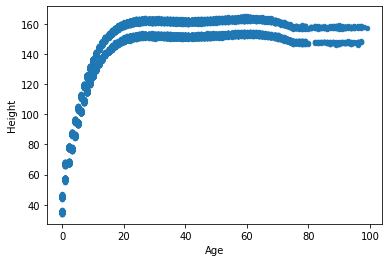

In [ ]:
synthetic_population.sample(n=30000).plot.scatter(x='Age', y='Height')

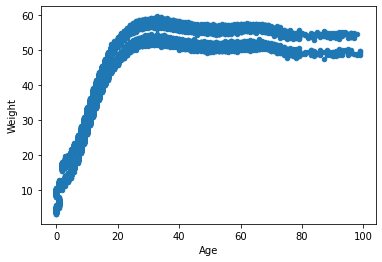

In [ ]:
synthetic_population.sample(n=30000).plot.scatter(x='Age', y='Weight')

In [ ]:
male_working_ratio = 1-0.12
female_working_ratio = 1-0.67
print(male_working_ratio, female_working_ratio)

0.88 0.32999999999999996


In [ ]:
new_df = synthetic_population[synthetic_population['JobLabel'].apply(lambda x : x not in ['Housewife', 'No occupation', 'Out of labour force'])]
new_df.reset_index(drop=True, inplace=True)
# new_df

In [ ]:
male_above_18 = ((new_df['Age']>18) & (new_df['SexLabel']=='Male')).astype(int)
male_below_18 = ((new_df['Age']<19) & (new_df['SexLabel']=='Male')).astype(int)
female_above_18 = ((new_df['Age']>18) & (new_df['SexLabel']=='Female')).astype(int)
female_below_18 = ((new_df['Age']<19) & (new_df['SexLabel']=='Female')).astype(int)

working_males = (np.random.random(size=male_above_18.shape)<male_working_ratio).astype(int)
working_females = (np.random.random(size=female_above_18.shape)<female_working_ratio).astype(int)

working = (male_above_18*working_males)+(female_above_18*working_females)+male_below_18+female_below_18

not_working = 1-working

In [ ]:
(working==1).value_counts()

True     8732014
False    3707597
dtype: int64

In [ ]:
new_df.loc[not_working==1, 'JobLabel'] = "Homebound"
new_df.loc[not_working==1, 'JobID'] = 156
new_df.loc[not_working==1, 'WorkPlaceID'] = 0
new_df.loc[not_working==1, 'W_Lat'] = float("nan")
new_df.loc[not_working==1, 'W_Lon'] = float("nan")
new_df.loc[not_working==1, 'essential_worker'] = 0

new_df['H_Lat'] = new_df['H_Lat'].apply(lambda x : round(x,5))
new_df['H_Lon'] = new_df['H_Lon'].apply(lambda x : round(x,5))

new_df['W_Lat'] = new_df['W_Lat'].apply(lambda x : round(x,5))
new_df['W_Lon'] = new_df['W_Lon'].apply(lambda x : round(x,5))

new_df['school_lat'] = new_df['school_lat'].apply(lambda x : round(x,5))
new_df['school_long'] = new_df['school_long'].apply(lambda x : round(x,5))

new_df['public_place_lat'] = new_df['public_place_lat'].apply(lambda x : round(x,5))
new_df['public_place_long'] = new_df['public_place_long'].apply(lambda x : round(x,5))
new_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,SexLabel,Age,Religion,Caste,HHID,H_Lat,H_Lon,AdminUnitName,AdminUnitLatitude,AdminUnitLongitude,JobLabel,JobID,essential_worker,PublicTransport_Jobs,Adherence_to_Intervention,WorksAtSameCategory,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,StateLabel,PSUID,Agent_ID,District,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy,Weight,Height
0,Male,41,Hindu,SC,51902097582,18.98661,72.85275,F/S,19.005878,72.839688,Ag labour,63,0,1,0.9,True,2001000038901,19.03888,72.88146,0,NaN,NaN,3001000003866,18.99472,72.85925,Maharashtra,2,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,55.97,160.90
1,Male,44,Hindu,SC,51902097582,18.98661,72.85275,F/S,19.005878,72.839688,Ag labour,63,0,1,0.9,True,2001000001766,19.00677,72.83966,0,NaN,NaN,3001000000187,19.08375,72.88235,Maharashtra,16,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,57.13,160.41
2,Female,39,Hindu,SC,51902097582,18.98661,72.85275,F/S,19.005878,72.839688,Homebound,156,0,1,0.0,True,0,NaN,NaN,0,NaN,NaN,3001000001887,19.10373,72.83012,Maharashtra,7,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,51.06,151.93
3,Female,36,Hindu,SC,51902097582,18.98661,72.85275,F/S,19.005878,72.839688,Homebound,156,0,1,0.0,True,0,NaN,NaN,0,NaN,NaN,3001000002375,19.03397,72.87553,Maharashtra,10,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,52.31,151.84
4,Male,41,Hindu,SC,51902100136,19.02009,72.86148,F/N,19.029420,72.854606,Construction,95,0,1,0.9,True,2001000009395,18.98349,72.81945,0,NaN,NaN,3001000000926,19.11384,72.92794,Maharashtra,22,5.190000e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,56.85,162.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12439606,Female,7,sikh,other,51902085222,19.07437,72.88904,L,19.070467,72.879094,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000021853,19.08079,72.90048,3001000000384,19.09459,72.86915,Maharashtra,2,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,18.52,109.43
12439607,Female,7,sikh,other,51902085477,19.20209,72.84848,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000018217,19.15804,72.83217,3001000002980,19.17603,72.81064,Maharashtra,5,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,19.34,108.40
12439608,Female,8,sikh,other,51902085477,19.20209,72.84848,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000045706,19.20677,72.81817,3001000003865,19.20010,72.82919,Maharashtra,5,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,21.54,114.91
12439609,Female,7,sikh,other,51902085477,19.20209,72.84848,R/S,19.203963,72.845396,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000029586,19.19140,72.93251,3001000001620,19.22459,72.82064,Maharashtra,14,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,19.63,109.65


In [ ]:
sub_df = new_df.sample(n=10000)
sub_df[sub_df['JobLabel']!= 'Homebound']

,SexLabel,Age,Religion,Caste,HHID,H_Lat,H_Lon,AdminUnitName,AdminUnitLatitude,AdminUnitLongitude,JobLabel,JobID,essential_worker,PublicTransport_Jobs,Adherence_to_Intervention,WorksAtSameCategory,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,StateLabel,PSUID,Agent_ID,District,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy,Weight,Height
11588733,Female,2,Hindu,other,51901394840,19.12929,72.85595,K/E,19.120092,72.852387,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000043435,19.14587,72.84272,3001000001114,19.12810,72.84085,Maharashtra,1,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,11.71,68.18
1840448,Female,47,Muslim,other,51902197600,18.94733,72.82820,C,18.946123,72.824901,Construction,95,0,1,0.9,True,2001000046515,19.01001,72.83472,0,NaN,NaN,3001000001790,18.93023,72.83105,Maharashtra,17,5.190184e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,51.15,151.81
9187141,Female,12,Hindu,other,51902159592,19.01611,72.84090,G/N,19.023175,72.843432,Student,199,0,1,0.8,NaN,0,NaN,NaN,2001000027069,19.01487,72.84557,3001000004132,19.08266,72.86947,Maharashtra,17,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,32.13,133.93
9775697,Female,15,buddhist,SC,51902168641,19.00230,72.83273,G/S,19.008373,72.830409,Student,199,0,1,0.4,NaN,0,NaN,NaN,2001000007932,19.13530,72.93324,3001000004434,19.00827,72.82164,Maharashtra,7,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,38.74,141.95
933400,Male,48,Hindu,other,51902420060,18.97009,72.83610,E,18.971878,72.831327,Construction,95,0,1,0.9,True,2001000050884,19.17394,72.95099,0,NaN,NaN,3001000004289,18.98997,72.82644,Maharashtra,17,5.190093e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,55.88,161.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832149,Male,79,Hindu,other,51901398932,19.09693,72.87312,K/E,19.120092,72.852387,Mail distributors,38,1,1,1.0,True,2001000036618,19.16976,72.84138,0,NaN,NaN,3001000001203,19.09714,72.87348,Maharashtra,23,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,53.83,157.71
5033831,Female,30,Hindu,other,51902085536,19.03507,72.92527,M/E,19.056477,72.921546,Loaders,97,1,1,0.1,True,2001000024058,19.08679,72.86750,0,NaN,NaN,3001000003525,19.08087,72.86596,Maharashtra,2,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,52.74,152.14
9430869,Female,0,Hindu,other,51902590880,19.00722,72.81805,G/S,19.008373,72.830409,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000006361,19.02051,72.86714,3001000001056,19.16945,72.94672,Maharashtra,11,NaN,Mumbai,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,4.24,35.91
1839214,Female,45,Muslim,other,51902180023,19.02466,72.87310,F/N,19.029420,72.854606,Shopkeepers,40,1,0,0.9,True,2001000015694,18.98786,72.83297,0,NaN,NaN,3001000001812,19.03287,72.89430,Maharashtra,16,5.190184e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,50.83,152.29


In [ ]:
sub_df[sub_df['JobLabel']== 'Homebound']

,SexLabel,Age,Religion,Caste,HHID,H_Lat,H_Lon,AdminUnitName,AdminUnitLatitude,AdminUnitLongitude,JobLabel,JobID,essential_worker,PublicTransport_Jobs,Adherence_to_Intervention,WorksAtSameCategory,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,StateLabel,PSUID,Agent_ID,District,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy,Weight,Height
3524310,Female,40,Hindu,other,51900024761,19.03241,72.89103,M/W,19.061101,72.899304,Homebound,156,0,1,0.0,True,0,NaN,NaN,0,NaN,NaN,3001000000515,19.07577,72.87303,Maharashtra,15,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,52.42,152.58
4177805,Female,22,Hindu,other,51901696871,19.10320,72.87742,K/E,19.120092,72.852387,Homebound,156,0,1,0.3,True,0,NaN,NaN,0,NaN,NaN,3001000003370,19.16432,72.87311,Maharashtra,21,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,49.08,150.46
5437701,Female,60,Hindu,other,51901367209,19.11536,72.85006,K/E,19.120092,72.852387,Homebound,156,0,1,1.0,True,0,NaN,NaN,0,NaN,NaN,3001000003319,18.95117,72.81778,Maharashtra,16,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,50.90,153.42
5774840,Female,29,Hindu,other,51900089080,19.22813,72.81433,R/C,19.231119,72.855828,Homebound,156,0,1,0.2,True,0,NaN,NaN,0,NaN,NaN,3001000000209,19.23316,72.84381,Maharashtra,15,NaN,Mumbai,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,52.15,152.18
7947387,Female,38,buddhist,other,51900033781,19.05926,72.88582,L,19.070467,72.879094,Homebound,156,0,1,0.0,True,0,NaN,NaN,0,NaN,NaN,3001000001867,19.06042,72.88477,Maharashtra,11,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,51.71,151.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591075,Female,50,Muslim,other,51902384532,19.04091,72.85350,G/N,19.023175,72.843432,Homebound,156,0,1,0.9,True,0,NaN,NaN,0,NaN,NaN,3001000001505,19.04263,72.85348,Maharashtra,14,5.190159e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,50.26,151.47
6023737,Female,25,Hindu,other,51901717924,19.06843,72.85300,H/E,19.085106,72.844545,Homebound,156,0,1,0.2,True,0,NaN,NaN,0,NaN,NaN,3001000002804,19.16034,72.94061,Maharashtra,13,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,51.33,151.08
1221146,Female,75,Hindu,other,51902519223,19.03414,72.86705,F/N,19.029420,72.854606,Homebound,156,0,1,1.0,True,0,NaN,NaN,0,NaN,NaN,3001000004600,19.02568,72.85768,Maharashtra,15,5.190122e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,50.21,147.82
4533027,Female,30,Hindu,other,51900787522,19.21602,72.81810,R/C,19.231119,72.855828,Homebound,156,0,1,0.1,True,0,NaN,NaN,0,NaN,NaN,3001000002399,18.96817,72.83515,Maharashtra,21,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,52.99,152.12


In [ ]:
new_df.to_csv("/content/drive/MyDrive/syndata_ism/mumbai/Mumbai/mumbai_apply_final_fixes.csv", index=False)

In [ ]:
!ls /content/drive/MyDrive/syndata_ism/mumbai/Mumbai/

mumbai_123.tar.gz			mumbai_apply_final_fixes.csv
Mumbai_Add_Height_Weight_Homebound.csv	Mumbai_Synthpop_v1.csv
